<a href="https://colab.research.google.com/github/mwithgod3952/Machine_Learning_Theory_jh/blob/master/R_%EC%84%B1%EA%B3%BC%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("party")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’




In [2]:
install.packages("ROCR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




In [3]:
library(rpart)
library(party)
library(ROCR)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



In [4]:
x <- kyphosis[sample(1:nrow(kyphosis), nrow(kyphosis), replace=F),]
x.train <- kyphosis[1:floor(nrow(x)*0.75),]
x.evaluate <- kyphosis[1:floor(nrow(x)*0.75):nrow(x),]

Warning message in 1:floor(nrow(x) * 0.75):nrow(x):
“numerical expression has 60 elements: only the first used”


In [5]:
x.model <- cforest(Kyphosis~Age+Number+Start, data=x.train)
x.evaluate$prediction <- predict(x.model, newdata=x.evaluate)
x.evaluate$correct <- x.evaluate$prediction == x.evaluate$Kyphosis

Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”
Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”
Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”
Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”
Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”
Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”
Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”
Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”
Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”
Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”
Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtr

In [6]:
print(paste("% of predicted classification correct", mean(x.evaluate$correct)))

[1] "% of predicted classification correct 0.790123456790123"


In [7]:
x.evaluate$probabilities <- 1 - unlist(treeresponse(x.model, newdata=x.evaluate), use.names=F)[seq(1,nrow(x.evaluate)*2,2)]

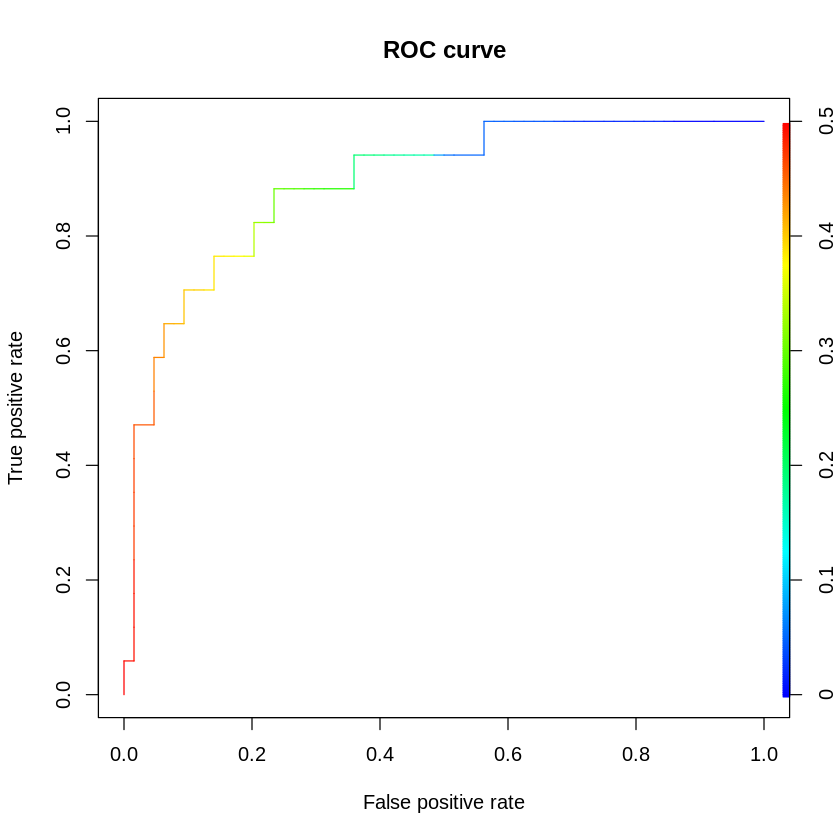

In [8]:
pred <- prediction(x.evaluate$probabilities, x.evaluate$Kyphosis)
perf <- performance(pred, "tpr", "fpr")
plot(perf, main="ROC curve", colorize=T)

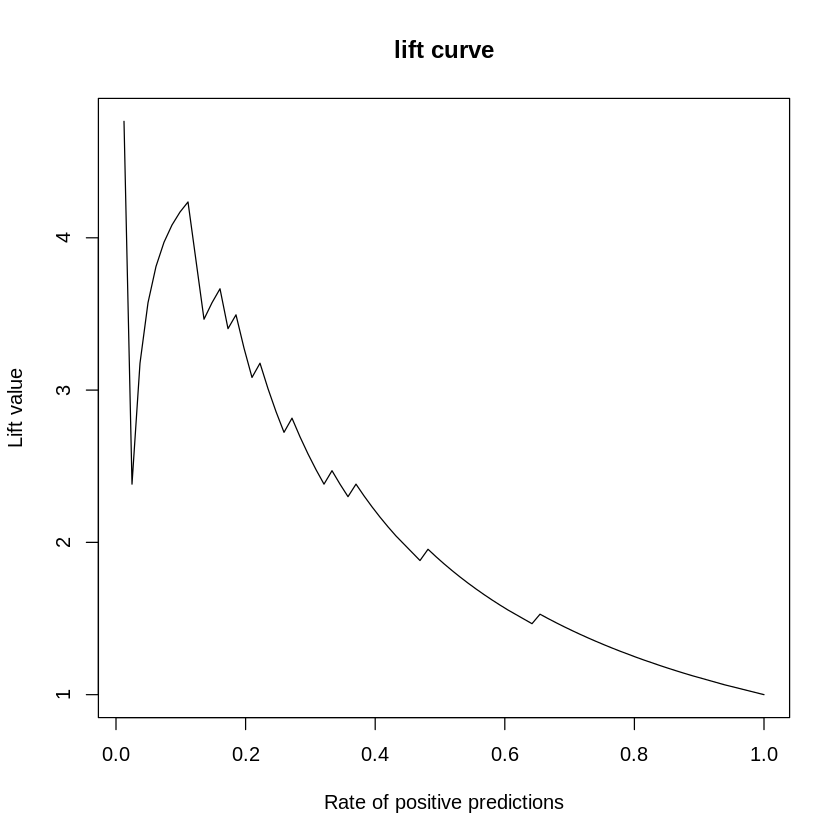

In [9]:
perf <- performance(pred, "lift", "rpp")
plot(perf, main="lift curve")